In [7]:
# preprocess_ray.py
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    # Exemple: encodage simple des colonnes textuelles
    text_columns = ['Crop Coefficient stage', 'pH_Risk']
    for col in text_columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    # Remplir les valeurs manquantes par 0
    df.fillna(0, inplace=True)
    return df


🌱 Accuracy pour Irrigation_Label: 1.00

Structure simple de l’arbre :
|--- Soil_Moisture_% <= 45.03
|   |--- class: 1
|--- Soil_Moisture_% >  45.03
|   |--- class: 0



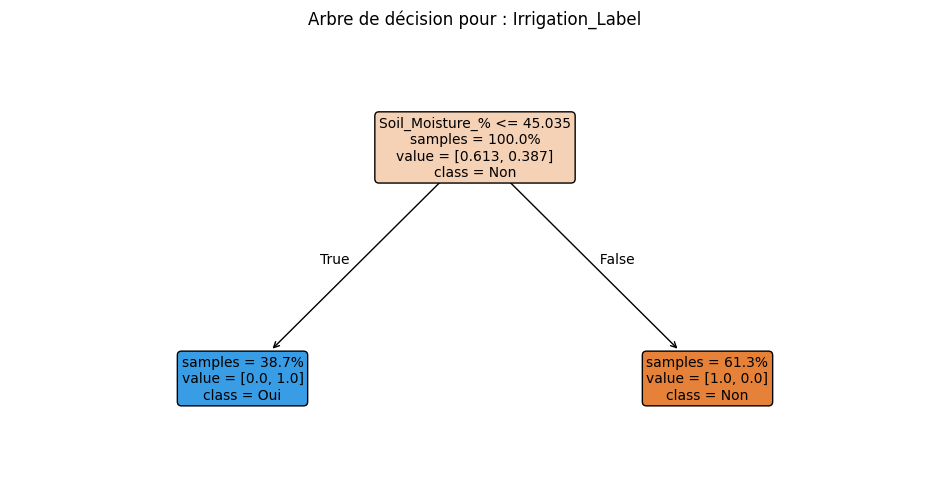


🌱 Accuracy pour Fertilisation_Label: 1.00

Structure simple de l’arbre :
|--- Humidity <= 94.97
|   |--- Humidity <= 93.69
|   |   |--- class: 0
|   |--- Humidity >  93.69
|   |   |--- Humidity <= 93.70
|   |   |   |--- class: 1
|   |   |--- Humidity >  93.70
|   |   |   |--- class: 0
|--- Humidity >  94.97
|   |--- Temperature <= 26.75
|   |   |--- Soil_Moisture_% <= 35.57
|   |   |   |--- class: 1
|   |   |--- Soil_Moisture_% >  35.57
|   |   |   |--- class: 0
|   |--- Temperature >  26.75
|   |   |--- class: 0



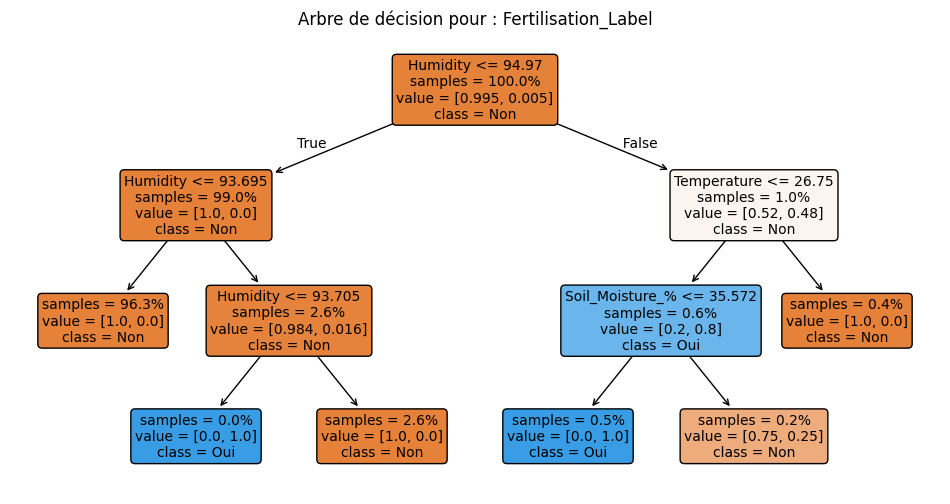


🌱 Accuracy pour Harvest_Label: 0.94

Structure simple de l’arbre :
|--- pH <= 3.22
|   |--- Temperature <= 18.80
|   |   |--- class: 0
|   |--- Temperature >  18.80
|   |   |--- Humidity <= 60.55
|   |   |   |--- class: 0
|   |   |--- Humidity >  60.55
|   |   |   |--- class: 0
|--- pH >  3.22
|   |--- pH <= 3.75
|   |   |--- pH <= 3.53
|   |   |   |--- class: 0
|   |   |--- pH >  3.53
|   |   |   |--- class: 0
|   |--- pH >  3.75
|   |   |--- Soil_Moisture_% <= 98.34
|   |   |   |--- class: 0
|   |   |--- Soil_Moisture_% >  98.34
|   |   |   |--- class: 0



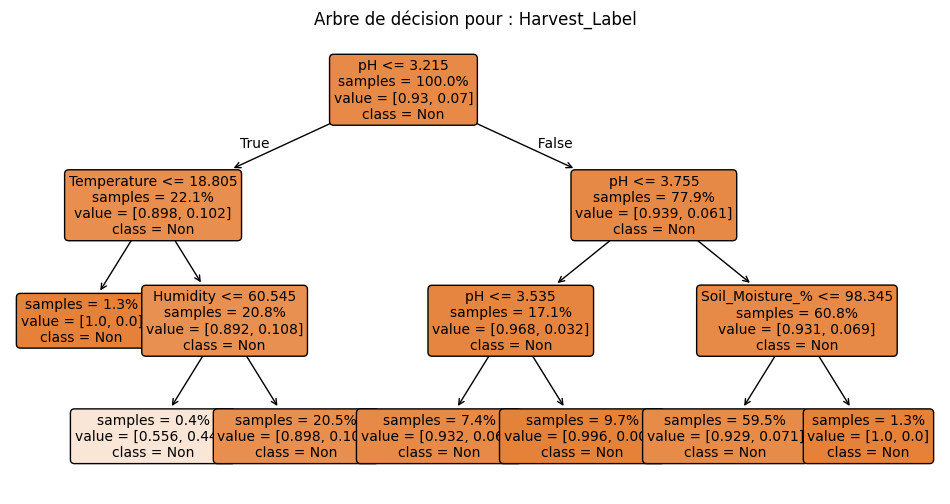

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib
from preprocess_ray import preprocess  # fonction de prétraitement de vos données

# -----------------------------
# 1) Charger et prétraiter les données
# -----------------------------
df = pd.read_csv("../Data_Tomates final.csv")  # chemin vers votre fichier CSV
df = preprocess(df)  # nettoyage, encodage des colonnes textuelles, etc.

# -----------------------------
# 2) Définir les features et les labels
# -----------------------------
features = ['Temperature', 'Humidity', 'pH', 'Soil_Moisture_%']  # colonnes mesurables par capteurs
labels = ['Irrigation_Label', 'Fertilisation_Label', 'Harvest_Label']  # décisions à prédire

X = df[features]

# -----------------------------
# 3) Boucle d'entraînement pour chaque label
# -----------------------------
for label in labels:
    y = df[label]

    # Séparation des données en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Création et entraînement du modèle Decision Tree
    tree_model = DecisionTreeClassifier(
        criterion='entropy',   # utilisation de l'entropie pour le gain d'information
        max_depth=3,           # profondeur maximale de l'arbre
        random_state=42
    )
    tree_model.fit(X_train, y_train)

    # Prédiction sur le jeu de test
    y_pred = tree_model.predict(X_test)
    print(f"\n🌱 Accuracy pour {label}: {accuracy_score(y_test, y_pred):.2f}")

    # Sauvegarde du modèle pour utilisation future
    joblib.dump(tree_model, f'../models/tree_{label}.pkl')

    # Affichage texte simplifié de l'arbre
    print("\nStructure simple de l’arbre :")
    r = export_text(tree_model, feature_names=features, show_weights=False)
    print(r)

    # Affichage graphique de l'arbre
    plt.figure(figsize=(12, 6))
    plot_tree(
        tree_model,
        feature_names=features,
        class_names=['Non', 'Oui'],  # adapter selon vos classes
        filled=True,
        rounded=True,
        fontsize=10,
        proportion=True,
        impurity=False  # enlève entropie pour simplifier le graphique
    )
    plt.title(f"Arbre de décision pour : {label}")
    plt.show()
